# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first # what is it?

Given a list of values, there are several ways to count the frequency of each value.

In [2]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [4]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [55]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [6]:
hist.Freq(2)

2

In [7]:
# Huy: Try two more example of the Freq method
print(hist.Freq(3))  # should return 1
print(hist.Freq(-1)) # should return 0

1
0


In [8]:
# Huy: From the code, there's also the Freqs method
print(hist.Freqs([2, 5])) # should return [2, 1]
print(hist.Freqs([3, 7, -8])) # should return [1, 0, 0]

[2, 1]
[1, 0, 0]


You can also use the bracket operator, which does the same thing.

In [7]:
# Yes, because it inherits from _DictWrapper, which is "an object that contains a dictionary"
# But what defines the operation []?
hist[2]

2

If the value does not appear, it has frequency 0.

In [9]:
hist[4]

0

The `Values` method returns the values:

In [10]:
hist.Values() # the book says unsorted...

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [11]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [12]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a **wrapper** for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

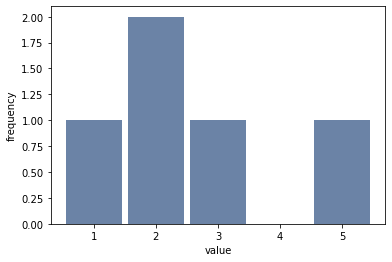

In [13]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

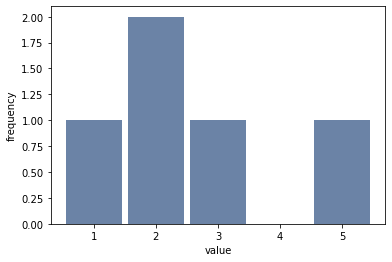

<Figure size 576x432 with 0 Axes>

In [19]:
# Huy: Strange because the book use thinkplot.Show. What's the difference between Config and Show methods then?
# I think we definitely should just use Config because Show doesn't hide the text residues
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

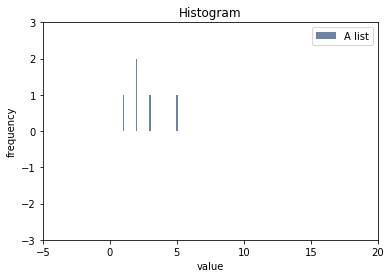

In [63]:
# Huy: Let's practice using the Config method
# Need to continue exploring the rest, such as xticks, yticks, etc.

# add legend to my histogram and change width of the bars (thanks to reading docs)
# How do you know this by looking at the code?
# Ok, I think I have the answer: https://matplotlib.org/api/_as_gen/matplotlib.patches.Rectangle.html
# I messed up with the code and it threw an error, 'Rectangle' object has no property 'pos'
# Then I googled matplotlib with that phrase and it took me to the link above.
# For example, in there, label is a valid (optional) argument
thinkplot.Hist(hist, label="A list", width=0.1)
thinkplot.Config(title='Histogram',
                 xlabel='value', 
                 ylabel='frequency',
                 xlim=[-5, 20], # I know it's a list because of reading a book. I don't know if only look at the code
                 ylim=[-3, 3]
                )

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [34]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

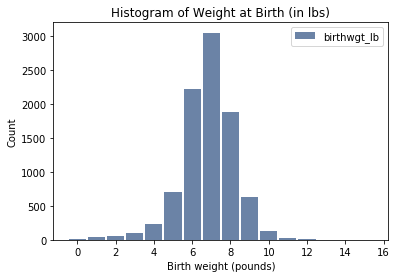

In [35]:
# Huy: add title to the plot
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count', title='Histogram of Weight at Birth (in lbs)')

Before plotting the ages, I'll apply `floor` to round down:

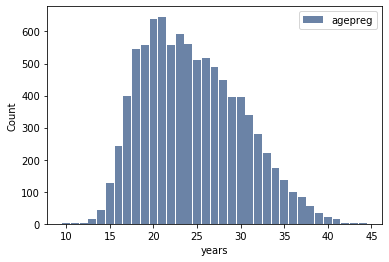

In [44]:
ages = np.floor(live.agepreg)
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

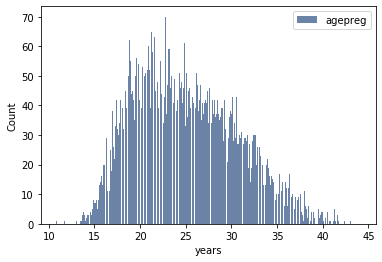

In [38]:
# Huy: let's see what happens if we don't round down the ages
ages = live.agepreg
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')
# Ah, of course, because ages are in decimals, so it's hard to group them into bins

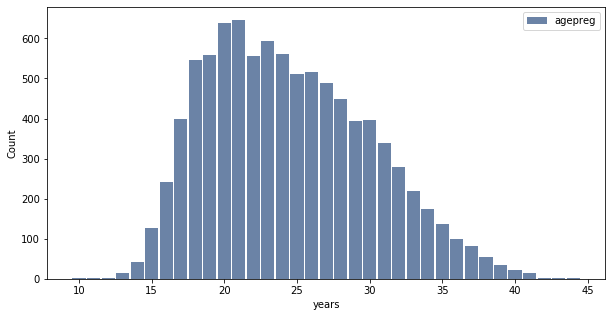

In [49]:
# Huy: can I make this plot bigger with plt.figure, just like the way I usually do?
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')
# Yep, it works, but if we look at the code carefully, we see there are a lot of redundancies, right?
# So should I study the code and tweak it or just use it and make it works, even at the cost of redundancies?

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

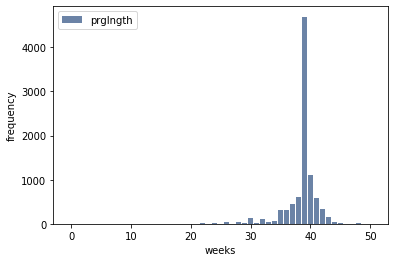

In [80]:
# Solution goes here. Note that you should use live dataframe instead of preg dataframe
hist = thinkstats2.Hist(live['prglngth']) # first, find the histogram, which is a map from a value to its frequencies
thinkplot.Hist(hist, label='prglngth') # then plot the histogram
thinkplot.Config(xlabel='weeks', ylabel='frequency', title='')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [82]:
# Huy: where is it? I can't find in the docs for Smallest.
# The trick is to do hist. + tab to see all the available methods, but still don't have the docs for them all.

# Values < 10 are certainly errors (maybe due to incorrect recodes)
# 10 <= values <= 30, hard to be sure about (maybe errors, maybe prematures)
# 30 < values, probably legitimate
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


Use `Largest` to display the longest pregnancy lengths.

In [84]:
# Solution goes here
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [85]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

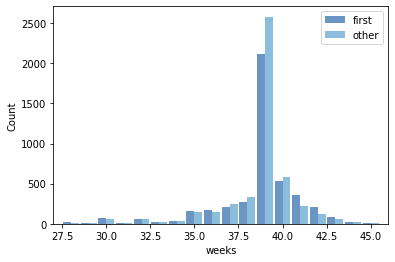

In [87]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [88]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

38.56055968517709 7.302662067826851 2.702343810070593


Here are the mean and standard deviation:

In [89]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [90]:
# Solution goes here
assert(std**2==var)

Here's are the mean pregnancy lengths for first babies and others:

In [91]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [92]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

**This functon computes the Cohen effect size, which is the difference in means expressed in number of pooled standard deviations:** $$d = \dfrac{\bar{x}_1 - \bar{x}_2}{s}$$

In [93]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [95]:
# Solution goes here
CohenEffectSize(group1=firsts['prglngth'], group2=others['prglngth'])

0.028879044654449883

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [29]:
# Solution goes here

In [30]:
# Solution goes here

For the next few exercises, we'll load the respondent file:

In [31]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

In [32]:
# Solution goes here

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

In [33]:
# Solution goes here

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

In [34]:
# Solution goes here

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

In [35]:
# Solution goes here

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [36]:
# Solution goes here

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

In [37]:
# Solution goes here

Find the largest parities for high income respondents.

In [38]:
# Solution goes here

Compare the mean <tt>parity</tt> for high income respondents and others.

In [39]:
# Solution goes here

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [40]:
# Solution goes here